In [71]:
%matplotlib inline
import os

from typing import List

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

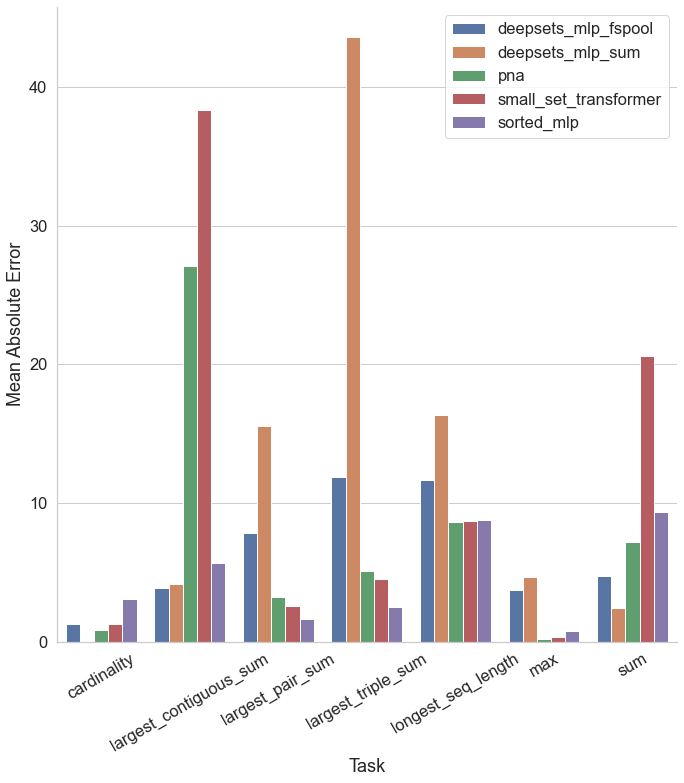

In [72]:
def plot_results(raw_results: pd.DataFrame, tasks: List[str], models: List[str]) -> None:
    ### Filtering ###
    results = raw_results.copy()
    results = results[results["type"].isin(models)]
    results = results[results["label"].isin(tasks)]

    results = results[["type", "label", "test_mae", "random_seed"]]

    results = results.rename(
        columns={
            "type": "model",
            "label": "task",
            "test_mae": "mae",
            "random_seed": "seed",
        }
    )

    ### Accumulation ###

    mean_results = results.groupby(["model", "task"], as_index=False).mean()
    mean_results.drop("seed", axis="columns", inplace=True)

    ### Display ###

    # display(mean_results.head(20))

    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")

    g = sns.catplot(
        data=mean_results,
        kind="bar",
        x="task",
        y="mae",
        hue="model",
        height=10
    )
    g.set_axis_labels("Task", "Mean Absolute Error")
    g.set_xticklabels(rotation=30)
    g.legend.set_title("")
    g._legend.remove()
    plt.legend(loc="upper right")

placeholder_results_filename = os.path.join(os.pardir, "accumulated-set-size-sweeps", "regression-entropy.csv")
results = pd.read_csv(placeholder_results_filename)

def load_regression_results() -> pd.DataFrame:
    part_1_results = pd.read_csv("../accumulated-set-size-sweeps/regression-no-entropy.csv")
    part_2_results = pd.read_csv("../accumulated-set-size-sweeps/regression-entropy.csv")
    part_2_results = part_2_results.drop(
        ["train_label_entropy", "valid_label_entropy", "test_label_entropy"],
        axis=1,
    )

    return pd.concat([part_1_results, part_2_results])

plot_results(
    load_regression_results(),
    tasks=["sum", "largest_pair_sum", "largest_triple_sum", "max", "cardinality", "longest_seq_length", "largest_contiguous_sum"],
    models=["deepsets_mlp_sum", "deepsets_mlp_fspool", "sorted_mlp", "pna", "small_set_transformer"]
)